In [3]:
!pip install pandas


In [4]:
!pip install dython

In [5]:
import pandas as pd
import glob
import os

In [6]:
from joblib import Parallel, delayed

In [7]:
import joblib
print(joblib.__version__)


1.2.0


In [8]:
import gc
gc.collect()  # Force garbage collection


0

In [215]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/Final_list_of_variables/weekly_stats_demo_cleaned_for_model_v4.csv'

# Read the CSV file into a DataFrame
weekly_stats_cleaned= pd.read_csv(file_path)

In [217]:
weekly_stats_cleaned['subj'].nunique()

119

In [219]:
# Remove the subject 'RWRAD_065' from the dataset
weekly_stats_cleaned_filtered = weekly_stats_cleaned[weekly_stats_cleaned['subj'] != 'RWRAD_065']

# Count the NaN values in each column after removing the subject
nan_count_filtered = weekly_stats_cleaned_filtered.isna().sum()

# Filter columns that have more than 0 NaN values
columns_with_nan_filtered = nan_count_filtered[nan_count_filtered > 0]

# Display the count of NaN values for each column with NaNs
columns_with_nan_filtered


avg_miles_per_chain       921
avg_minutes_per_chain     921
stoppage_probability      981
education_years             7
mean_efficiency           156
sd_efficiency             190
mean_tst                  156
sd_tst                    190
errand_weekend_count      885
home_weekday_count        404
medical_weekday_count    1023
none_weekday_count        891
social_weekday_count     1500
dtype: int64

In [221]:
len(weekly_stats_cleaned_filtered)

1500

In [223]:
weekly_stats_cleaned.dtypes

subj                             object
week_number                       int64
year                              int64
total_miles                     float64
total_trips                     float64
avg_miles_per_trip              float64
total_minutes                   float64
avg_minutes_per_trip            float64
non_nighttime_trips             float64
percent_non_nighttime           float64
am_7_9_trips                    float64
percent_am_7_9                  float64
nighttime_80_percent            float64
percent_nighttime_80            float64
pm_4_6_trips                    float64
percent_pm_4_6                  float64
within_15_miles                 float64
percent_within_15_miles         float64
within_25_miles                 float64
percent_within_25_miles         float64
trip_chains                     float64
avg_miles_per_chain             float64
avg_minutes_per_chain           float64
speed_60_mph                    float64
percent_speed_60_mph            float64


In [225]:
# Remove the subject 'RWRAD_065' from the dataset
weekly_stats_cleaned_filtered = weekly_stats_cleaned[weekly_stats_cleaned['subj'] != 'RWRAD_065']

# Count the NaN values in each column after removing the subject
nan_count_filtered = weekly_stats_cleaned_filtered.isna().sum()

# Filter columns that have more than 0 NaN values
columns_with_nan_filtered = nan_count_filtered[nan_count_filtered > 0]

# Display the count of NaN values for each column with NaNs
columns_with_nan_filtered


avg_miles_per_chain       921
avg_minutes_per_chain     921
stoppage_probability      981
education_years             7
mean_efficiency           156
sd_efficiency             190
mean_tst                  156
sd_tst                    190
errand_weekend_count      885
home_weekday_count        404
medical_weekday_count    1023
none_weekday_count        891
social_weekday_count     1500
dtype: int64

## Fill 0 in avg_miles_per_chain and avg_minutes_per_chain

In [228]:
weekly_stats_cleaned.head()

,subj,week_number,year,total_miles,total_trips,avg_miles_per_trip,total_minutes,avg_minutes_per_trip,non_nighttime_trips,percent_non_nighttime,...,education_numberofyears_nacc,mean_efficiency,sd_efficiency,mean_tst,sd_tst,errand_weekend_count,home_weekday_count,medical_weekday_count,none_weekday_count,social_weekday_count
0,RWRAD_001,11,2021,81.858703,17.0,4.815218,284.533333,16.737255,17.0,100.0,...,18.0,NaN,NaN,NaN,NaN,1.0,6.0,1.0,NaN,NaN
1,RWRAD_001,12,2021,89.800539,22.0,4.081843,303.000000,13.772727,22.0,100.0,...,18.0,NaN,NaN,NaN,NaN,2.0,8.0,NaN,NaN,NaN
2,RWRAD_001,13,2021,311.730769,31.0,10.055831,612.866667,19.769892,31.0,100.0,...,18.0,0.865308,0.040859,294.000000,72.778202,NaN,12.0,NaN,NaN,NaN
3,RWRAD_001,14,2021,83.971941,26.0,3.229690,311.983333,11.999359,26.0,100.0,...,18.0,0.879807,0.047948,365.000000,118.607195,3.0,7.0,NaN,NaN,NaN
4,RWRAD_001,15,2021,151.992413,20.0,7.599621,296.400000,14.820000,20.0,100.0,...,18.0,0.875554,0.040687,382.857143,68.433492,1.0,6.0,NaN,NaN,NaN


In [230]:
weekly_stats_cleaned[['avg_miles_per_chain', 'avg_minutes_per_chain']] = weekly_stats_cleaned[['avg_miles_per_chain', 'avg_minutes_per_chain']].fillna(0)


## Fill 0 in end trip variables

In [233]:
# Fill NaN values with 0 in the specific columns
columns_to_fill = [
    'errand_weekend_count', 
    'home_weekday_count', 
    'medical_weekday_count', 
    'none_weekday_count', 
    'social_weekday_count'
]

weekly_stats_cleaned[columns_to_fill] = weekly_stats_cleaned[columns_to_fill].fillna(0)



# Categorical to binary (label encoder)

In [236]:
# Ensure you are modifying the original DataFrame using .loc[]
weekly_stats_cleaned.loc[:, 'subj_type'] = weekly_stats_cleaned['subj_type'].apply(lambda x: 1 if x in ['mci', 'alzheimers'] else 0)

## mci/alzheimers= 1 and normalaging =0

# One hot encode (gender)

In [239]:
# Apply one-hot encoding using pd.get_dummies for 'gender' and 'race'
weekly_stats_cleaned = pd.get_dummies(weekly_stats_cleaned, columns=['gender'], drop_first=True)

In [241]:
# Ensure the columns are in int format after transformation
#weekly_stats_cleaned['race_white'] = weekly_stats_cleaned['race_white'].astype(int)
weekly_stats_cleaned['gender_male'] = weekly_stats_cleaned['gender_male'].astype(int)
weekly_stats_cleaned['subj_type'] = weekly_stats_cleaned['subj_type'].astype(int)


In [243]:
weekly_stats_cleaned.dtypes

subj                             object
week_number                       int64
year                              int64
total_miles                     float64
total_trips                     float64
avg_miles_per_trip              float64
total_minutes                   float64
avg_minutes_per_trip            float64
non_nighttime_trips             float64
percent_non_nighttime           float64
am_7_9_trips                    float64
percent_am_7_9                  float64
nighttime_80_percent            float64
percent_nighttime_80            float64
pm_4_6_trips                    float64
percent_pm_4_6                  float64
within_15_miles                 float64
percent_within_15_miles         float64
within_25_miles                 float64
percent_within_25_miles         float64
trip_chains                     float64
avg_miles_per_chain             float64
avg_minutes_per_chain           float64
speed_60_mph                    float64
percent_speed_60_mph            float64


In [245]:
!pip install joblib

from joblib import dump


## XGBoost with LOSO cross validation

### With parallel processing

#### 1) Using all variables

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  5.0min
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:  8.8min
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed: 10.1min
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed: 12.7min
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed: 15.2min
[Parallel(n_jobs=10)]: Done 112 out of 119 | elapsed: 17.8min remaining:  1.1min
[Parallel(n_jobs=10)]: Done 119 out of 119 | elapsed: 18.9min finished


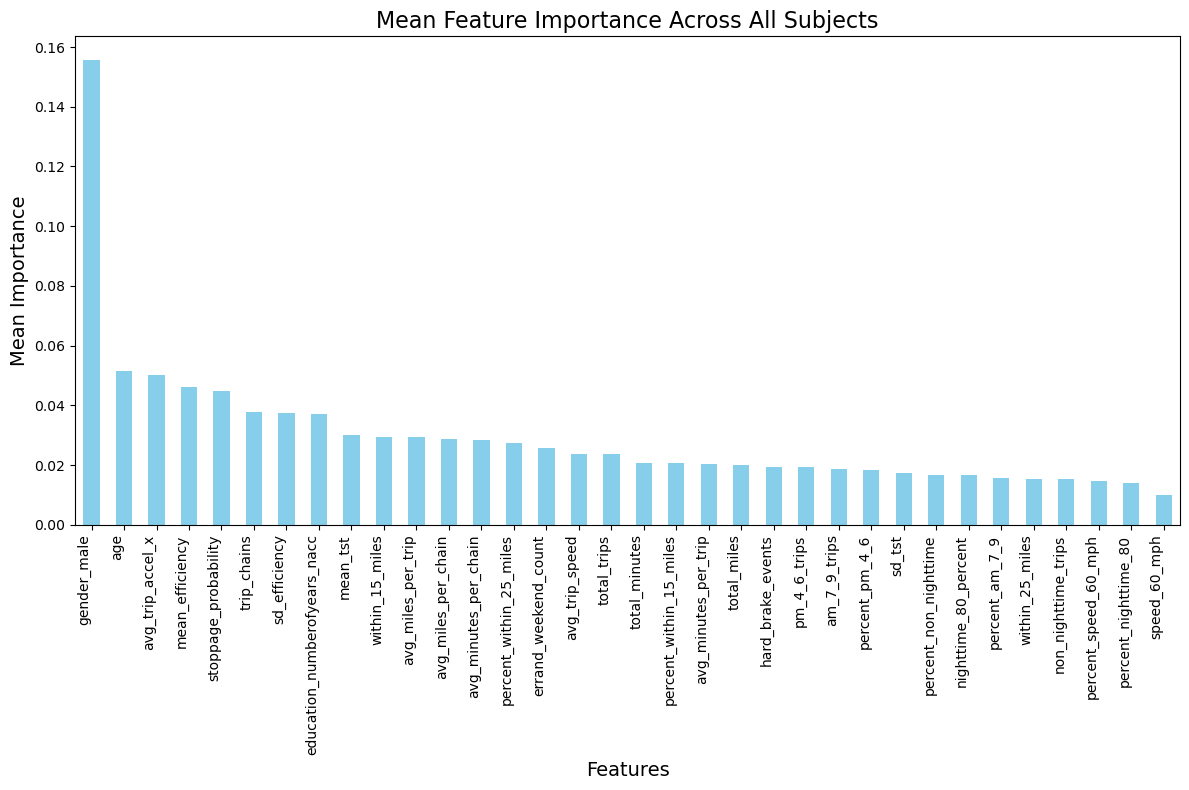

In [256]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed, dump
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

cv_splitter = StratifiedGroupKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}


def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # IMPORTANT: groups for StratifiedGroupKFold (subject IDs for training rows)
    groups_train = subjects[train_mask]

    # Handle class imbalance (safe guard)
    num_class_0 = (y_train == 0).sum()
    num_class_1 = (y_train == 1).sum()
    scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        n_jobs=1,
        tree_method="hist"
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="f1",
        cv=cv_splitter,
        n_jobs=1,
        random_state=42,
        verbose=0
    )

    # Fit RandomizedSearchCV on training data (WITH groups)
    random_search.fit(X_train, y_train, groups=groups_train)
    best_model = random_search.best_estimator_

    # Probabilities + predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_train = (y_prob_train >= 0.5).astype(int)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = getattr(best_model, "feature_importances_", None)

    # Collect results
    subject_results = []
    for true_label, pred_label, prob, idx in zip(y_test, y_pred, y_prob, X_test.index):
        subject_results.append([
            left_out_subject,
            idx,
            int(true_label),
            int(pred_label),
            float(prob),
            float(train_accuracy),
            float(test_accuracy),
            random_search.best_params_
        ])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs= 10, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Prob_1", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")


In [254]:
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_all_var.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_all_var.csv", index=True)

### 2) Using Only demographics

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    8.6s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    9.2s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   15.1s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:   21.0s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:   27.7s
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:   34.8s
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:   39.6s
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:   48.2s
[Parallel(n_jobs=14)]: Done 104 out of 119 | elapsed:   57.6s remaining:    8.2s
[Parallel(n_jobs=14)]: Done 116 out of 119 | elapsed:  1.1min remaining:    1.5s
[Parallel(n_jobs=14)]: Done 119 out of 119 | elapsed:  1.1min finished


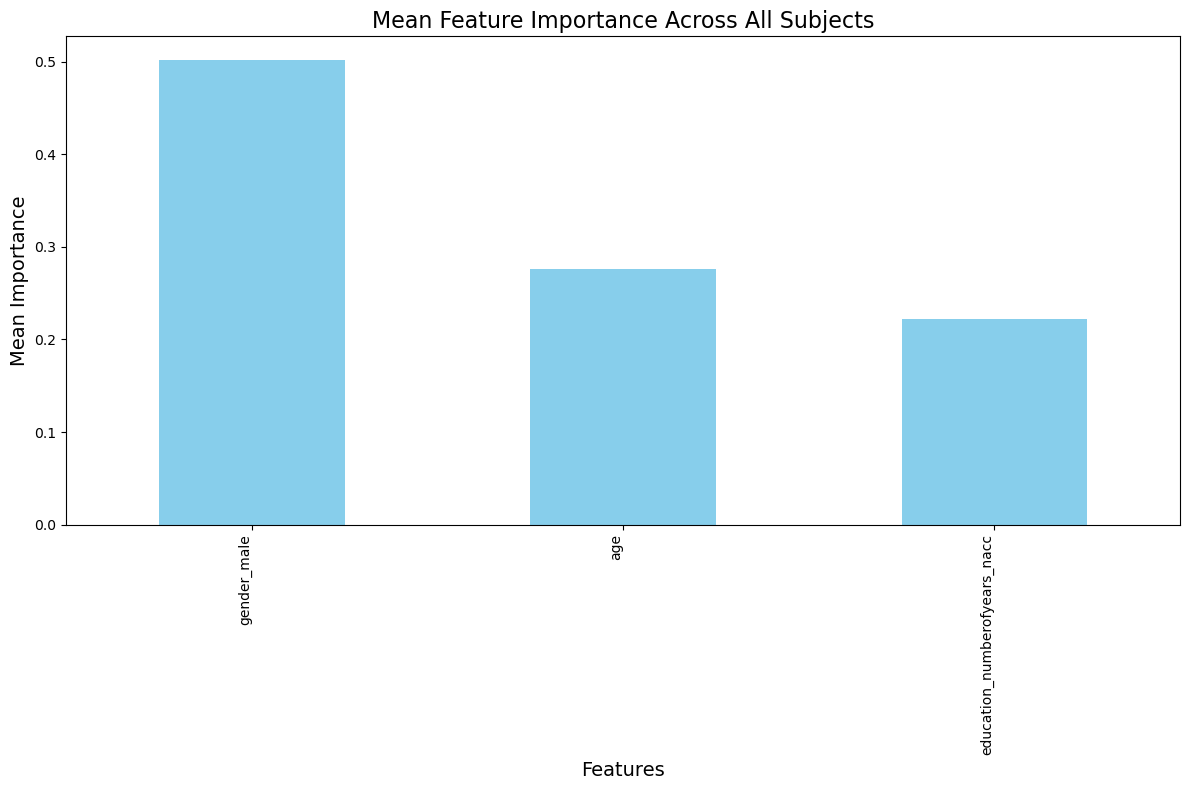

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Assuming weekly_stats_cleaned is your original dataframe
selected_columns = ['gender_male', 'age', 'education_numberofyears_nacc']
X = weekly_stats_cleaned[selected_columns]
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']
np.random.seed(42)

cv_splitter = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}


def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # IMPORTANT: groups for StratifiedGroupKFold (subject IDs for training rows)
    groups_train = subjects[train_mask]

    # Handle class imbalance (safe guard)
    num_class_0 = (y_train == 0).sum()
    num_class_1 = (y_train == 1).sum()
    scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        n_jobs=1,
        tree_method="hist"
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="f1",
        cv=cv_splitter,
        n_jobs=1,
        random_state=42,
        verbose=0
    )

    # Fit RandomizedSearchCV on training data (WITH groups)
    random_search.fit(X_train, y_train, groups=groups_train)
    best_model = random_search.best_estimator_

    # Probabilities + predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_train = (y_prob_train >= 0.5).astype(int)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = getattr(best_model, "feature_importances_", None)

    # Collect results
    subject_results = []
    for true_label, pred_label, prob, idx in zip(y_test, y_pred, y_prob, X_test.index):
        subject_results.append([
            left_out_subject,
            idx,
            int(true_label),
            int(pred_label),
            float(prob),
            float(train_accuracy),
            float(test_accuracy),
            random_search.best_params_
        ])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs= 14, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Prob_1", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")


In [63]:
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_demographics.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_demographics.csv", index=True)

### 3) Using Only Driving Features

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:   23.7s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:   24.7s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   50.2s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:  1.8min
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:  2.3min
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:  2.5min
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:  3.2min
[Parallel(n_jobs=14)]: Done 104 out of 119 | elapsed:  3.7min remaining:   32.2s
[Parallel(n_jobs=14)]: Done 116 out of 119 | elapsed:  4.1min remaining:    6.3s
[Parallel(n_jobs=14)]: Done 119 out of 119 | elapsed:  4.1min finished


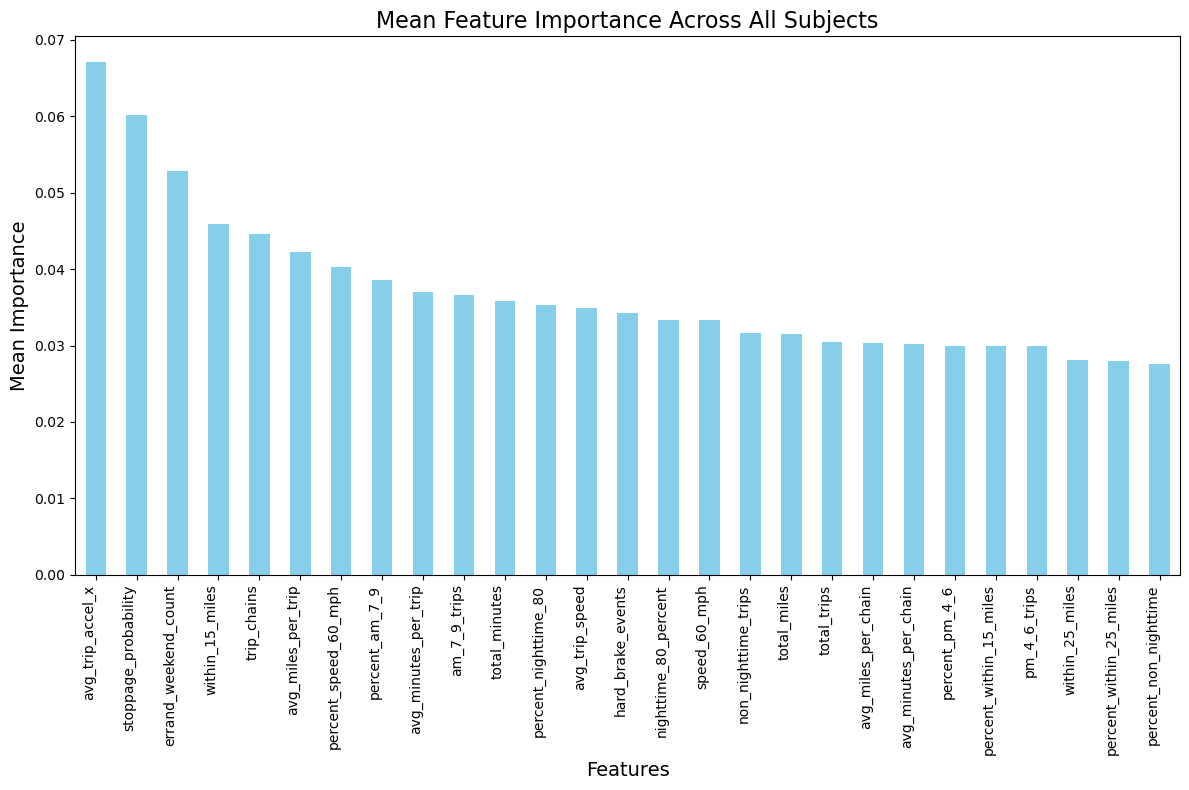

In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count', 'gender_male', 'age', 'education_numberofyears_nacc',  'sd_efficiency', 'mean_efficiency', 'mean_tst', 'sd_tst'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

np.random.seed(42)

cv_splitter = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}


def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # IMPORTANT: groups for StratifiedGroupKFold (subject IDs for training rows)
    groups_train = subjects[train_mask]

    # Handle class imbalance (safe guard)
    num_class_0 = (y_train == 0).sum()
    num_class_1 = (y_train == 1).sum()
    scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        n_jobs=1,
        tree_method="hist"
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="f1",
        cv=cv_splitter,
        n_jobs=1,
        random_state=42,
        verbose=0
    )

    # Fit RandomizedSearchCV on training data (WITH groups)
    random_search.fit(X_train, y_train, groups=groups_train)
    best_model = random_search.best_estimator_

    # Probabilities + predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_train = (y_prob_train >= 0.5).astype(int)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = getattr(best_model, "feature_importances_", None)

    # Collect results
    subject_results = []
    for true_label, pred_label, prob, idx in zip(y_test, y_pred, y_prob, X_test.index):
        subject_results.append([
            left_out_subject,
            idx,
            int(true_label),
            int(pred_label),
            float(prob),
            float(train_accuracy),
            float(test_accuracy),
            random_search.best_params_
        ])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs= 14, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Prob_1", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_driving_var.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_driving_var.csv", index=True)



### 4) Using Only Sleep

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    9.9s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:   11.0s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   21.0s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:   32.2s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:   44.6s
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:   57.4s
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:  1.1min
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done 104 out of 119 | elapsed:  1.6min remaining:   14.0s
[Parallel(n_jobs=14)]: Done 116 out of 119 | elapsed:  1.8min remaining:    2.7s
[Parallel(n_jobs=14)]: Done 119 out of 119 | elapsed:  1.8min finished


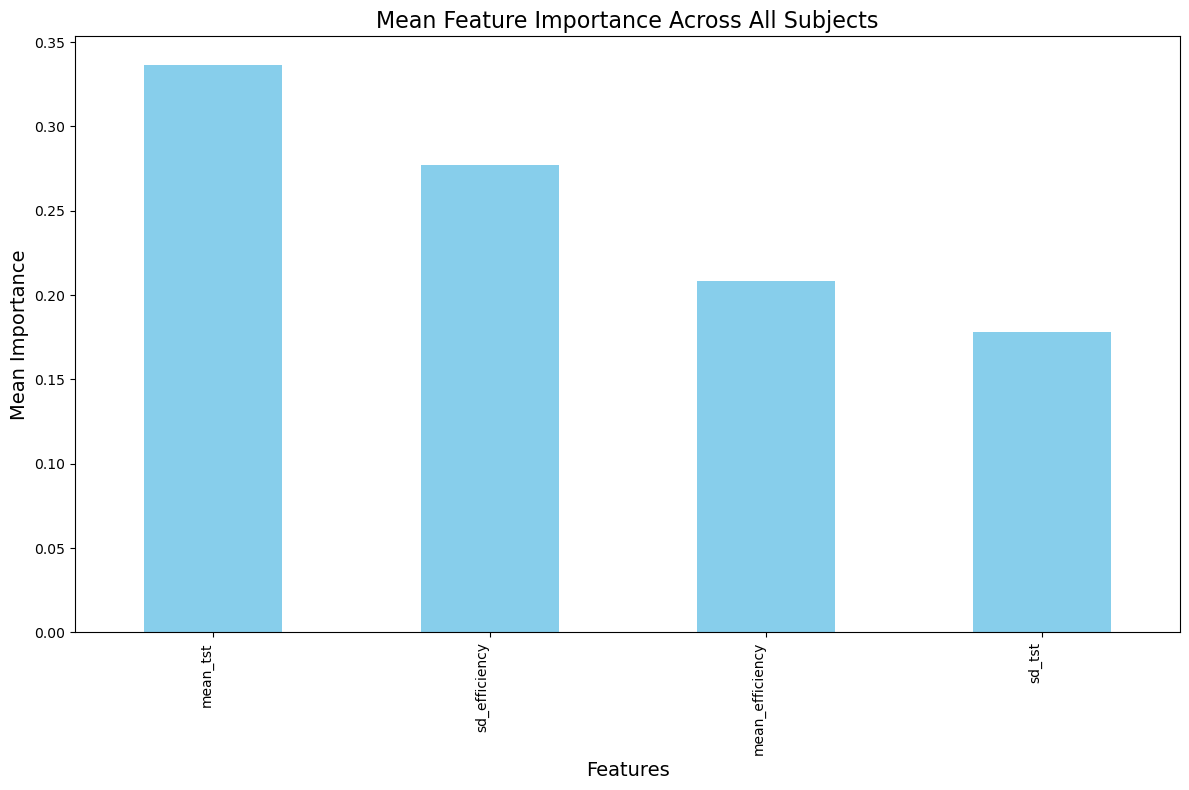

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Assuming weekly_stats_cleaned is your original dataframe
selected_columns = ['sd_efficiency', 'mean_efficiency', 'mean_tst', 'sd_tst']
X = weekly_stats_cleaned[selected_columns]
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

np.random.seed(42)

cv_splitter = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}


def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # IMPORTANT: groups for StratifiedGroupKFold (subject IDs for training rows)
    groups_train = subjects[train_mask]

    # Handle class imbalance (safe guard)
    num_class_0 = (y_train == 0).sum()
    num_class_1 = (y_train == 1).sum()
    scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        n_jobs=1,
        tree_method="hist"
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="f1",
        cv=cv_splitter,
        n_jobs=1,
        random_state=42,
        verbose=0
    )

    # Fit RandomizedSearchCV on training data (WITH groups)
    random_search.fit(X_train, y_train, groups=groups_train)
    best_model = random_search.best_estimator_

    # Probabilities + predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_train = (y_prob_train >= 0.5).astype(int)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = getattr(best_model, "feature_importances_", None)

    # Collect results
    subject_results = []
    for true_label, pred_label, prob, idx in zip(y_test, y_pred, y_prob, X_test.index):
        subject_results.append([
            left_out_subject,
            idx,
            int(true_label),
            int(pred_label),
            float(prob),
            float(train_accuracy),
            float(test_accuracy),
            random_search.best_params_
        ])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs= 14, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Prob_1", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_sleep.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_sleep.csv", index=True)



### 5) Using Only Demographics and Driving

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:   29.2s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:   32.8s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   59.1s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:  2.0min
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:  2.5min
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:  2.8min
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:  3.5min
[Parallel(n_jobs=14)]: Done 104 out of 119 | elapsed:  4.1min remaining:   35.0s
[Parallel(n_jobs=14)]: Done 116 out of 119 | elapsed:  4.4min remaining:    6.8s
[Parallel(n_jobs=14)]: Done 119 out of 119 | elapsed:  4.4min finished


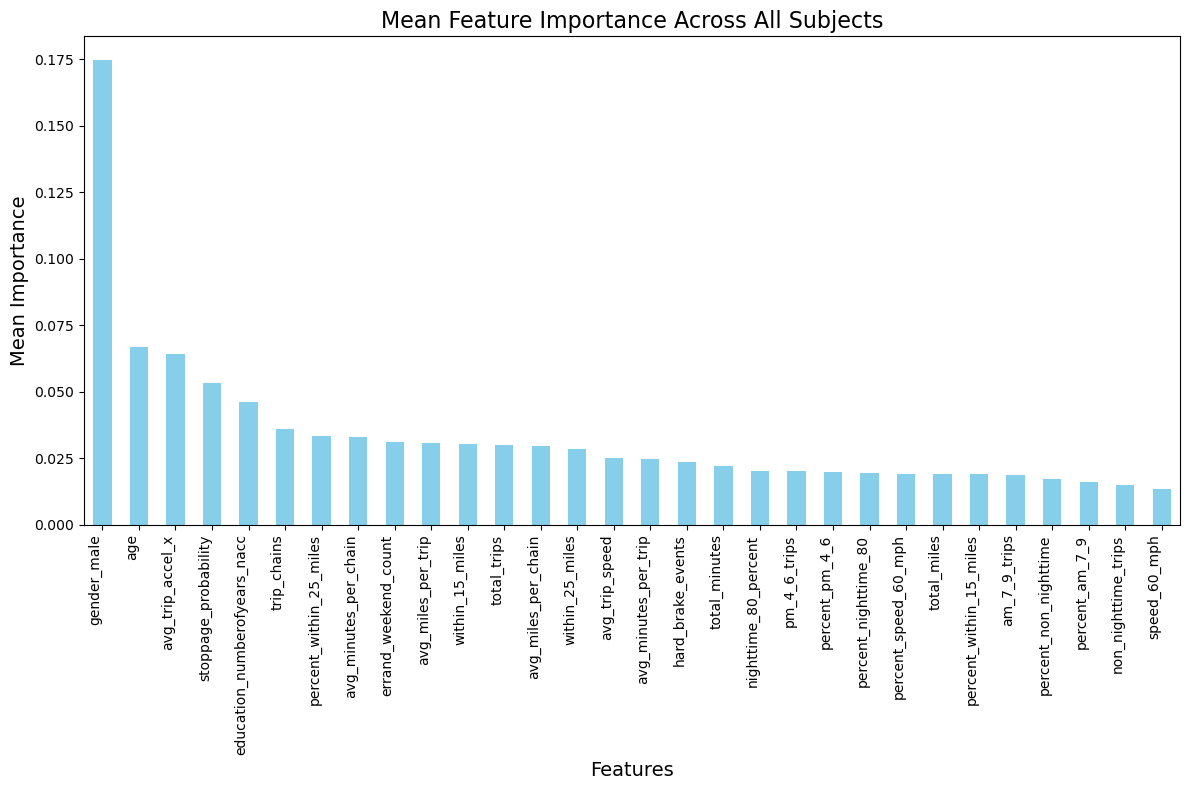

In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count','sd_efficiency', 'mean_efficiency', 'mean_tst', 'sd_tst'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

np.random.seed(42)

cv_splitter = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}


def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # IMPORTANT: groups for StratifiedGroupKFold (subject IDs for training rows)
    groups_train = subjects[train_mask]

    # Handle class imbalance (safe guard)
    num_class_0 = (y_train == 0).sum()
    num_class_1 = (y_train == 1).sum()
    scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        n_jobs=1,
        tree_method="hist"
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="f1",
        cv=cv_splitter,
        n_jobs=1,
        random_state=42,
        verbose=0
    )

    # Fit RandomizedSearchCV on training data (WITH groups)
    random_search.fit(X_train, y_train, groups=groups_train)
    best_model = random_search.best_estimator_

    # Probabilities + predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_train = (y_prob_train >= 0.5).astype(int)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = getattr(best_model, "feature_importances_", None)

    # Collect results
    subject_results = []
    for true_label, pred_label, prob, idx in zip(y_test, y_pred, y_prob, X_test.index):
        subject_results.append([
            left_out_subject,
            idx,
            int(true_label),
            int(pred_label),
            float(prob),
            float(train_accuracy),
            float(test_accuracy),
            random_search.best_params_
        ])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs= 14, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Prob_1", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_driving_demo.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_driving_demo).csv", index=True)



### 6) Using Only Driving and Sleep

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:   38.3s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:   40.5s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:  1.3min
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:  2.5min
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:  3.1min
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:  3.4min
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:  4.3min
[Parallel(n_jobs=14)]: Done 104 out of 119 | elapsed:  5.0min remaining:   43.4s
[Parallel(n_jobs=14)]: Done 116 out of 119 | elapsed:  5.5min remaining:    8.5s
[Parallel(n_jobs=14)]: Done 119 out of 119 | elapsed:  5.5min finished


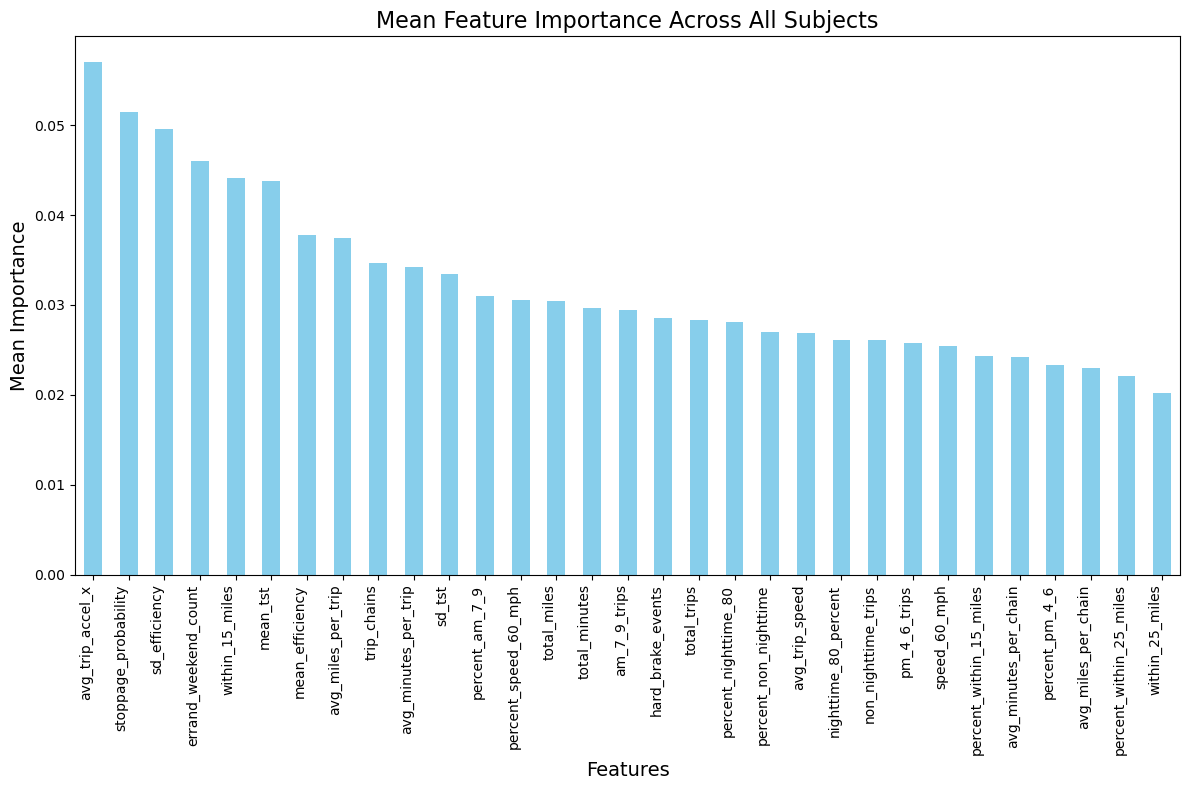

In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count', 'gender_male', 'age', 'education_numberofyears_nacc'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

np.random.seed(42)

cv_splitter = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}


def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # IMPORTANT: groups for StratifiedGroupKFold (subject IDs for training rows)
    groups_train = subjects[train_mask]

    # Handle class imbalance (safe guard)
    num_class_0 = (y_train == 0).sum()
    num_class_1 = (y_train == 1).sum()
    scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        n_jobs=1,
        tree_method="hist"
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="f1",
        cv=cv_splitter,
        n_jobs=1,
        random_state=42,
        verbose=0
    )

    # Fit RandomizedSearchCV on training data (WITH groups)
    random_search.fit(X_train, y_train, groups=groups_train)
    best_model = random_search.best_estimator_

    # Probabilities + predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_train = (y_prob_train >= 0.5).astype(int)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = getattr(best_model, "feature_importances_", None)

    # Collect results
    subject_results = []
    for true_label, pred_label, prob, idx in zip(y_test, y_pred, y_prob, X_test.index):
        subject_results.append([
            left_out_subject,
            idx,
            int(true_label),
            int(pred_label),
            float(prob),
            float(train_accuracy),
            float(test_accuracy),
            random_search.best_params_
        ])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs= 14, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Prob_1", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_driving_sleep.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_driving_sleep).csv", index=True)



## Demographics + Sleep

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:   14.6s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:   16.4s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   30.9s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:   45.9s
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:  1.0min
[Parallel(n_jobs=14)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=14)]: Done  70 tasks      | elapsed:  1.4min
[Parallel(n_jobs=14)]: Done  85 tasks      | elapsed:  1.7min
[Parallel(n_jobs=14)]: Done 104 out of 119 | elapsed:  2.0min remaining:   17.5s
[Parallel(n_jobs=14)]: Done 116 out of 119 | elapsed:  2.2min remaining:    3.4s
[Parallel(n_jobs=14)]: Done 119 out of 119 | elapsed:  2.2min finished


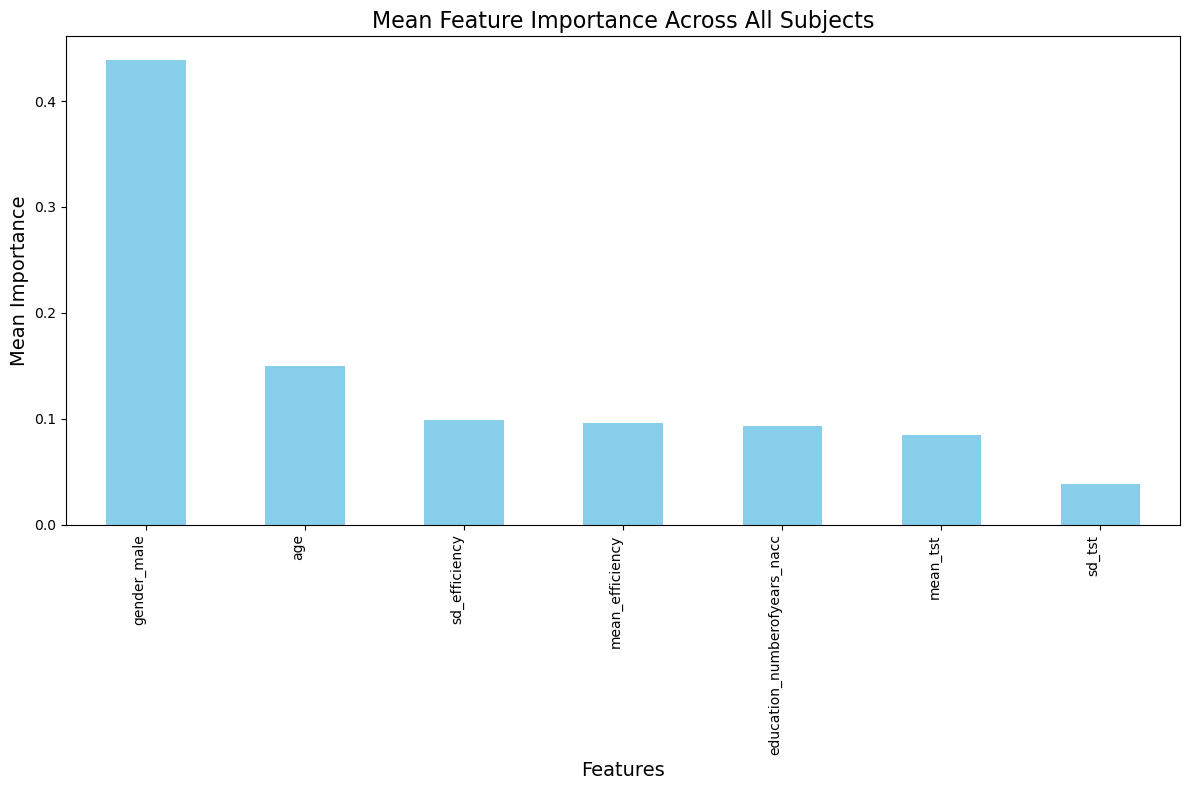

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Assuming weekly_stats_cleaned is your original dataframe
selected_columns = ['gender_male', 'age', 'education_numberofyears_nacc', 'sd_efficiency', 'mean_efficiency', 'mean_tst', 'sd_tst']
X = weekly_stats_cleaned[selected_columns]
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

np.random.seed(42)

cv_splitter = StratifiedGroupKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}


def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # IMPORTANT: groups for StratifiedGroupKFold (subject IDs for training rows)
    groups_train = subjects[train_mask]

    # Handle class imbalance (safe guard)
    num_class_0 = (y_train == 0).sum()
    num_class_1 = (y_train == 1).sum()
    scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        n_jobs=1,
        tree_method="hist"
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=50,
        scoring="f1",
        cv=cv_splitter,
        n_jobs=1,
        random_state=42,
        verbose=0
    )

    # Fit RandomizedSearchCV on training data (WITH groups)
    random_search.fit(X_train, y_train, groups=groups_train)
    best_model = random_search.best_estimator_

    # Probabilities + predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_train = (y_prob_train >= 0.5).astype(int)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = getattr(best_model, "feature_importances_", None)

    # Collect results
    subject_results = []
    for true_label, pred_label, prob, idx in zip(y_test, y_pred, y_prob, X_test.index):
        subject_results.append([
            left_out_subject,
            idx,
            int(true_label),
            int(pred_label),
            float(prob),
            float(train_accuracy),
            float(test_accuracy),
            random_search.best_params_
        ])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs= 14, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Prob_1", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_demo_sleep.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_demo_sleep.csv", index=True)



## Choose best hyperparameters from the losocv results for all feature combinations

In [92]:
import os
import glob
import pandas as pd
from ast import literal_eval

folder = r"C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results"

# grab all LOSOCV result csvs in that folder
files = sorted(glob.glob(os.path.join(folder, "losocv_results*.csv")))

print("Found files:")
for f in files:
    print(" -", os.path.basename(f))

summary_rows = []

for fp in files:
    df = pd.read_csv(fp)

    # sanity checks
    required_cols = {"Subject", "Best Hyperparameters"}
    missing = required_cols - set(df.columns)
    if missing:
        summary_rows.append({
            "file": os.path.basename(fp),
            "status": f"SKIPPED (missing columns: {sorted(missing)})",
            "n_subjects": None,
            "top_hp_count": None,
            "top_hp_pct": None,
            "best_hyperparameters": None
        })
        continue

    # one hyperparameter set per subject (since weekly rows repeat the same dict)
    hp_per_subject = df.groupby("Subject")["Best Hyperparameters"].first()

    # count frequency of each hyperparameter set
    hp_counts = hp_per_subject.value_counts(dropna=False)

    best_hp_str = hp_counts.index[0]
    best_count = int(hp_counts.iloc[0])
    n_subjects = int(hp_per_subject.shape[0])
    best_pct = best_count / n_subjects if n_subjects else None

    # parse dict safely (in case you want to use it programmatically later)
    best_hp_dict = None
    try:
        best_hp_dict = literal_eval(best_hp_str)  # safer than eval
    except Exception:
        # keep as string if it can't be parsed cleanly
        best_hp_dict = None

    summary_rows.append({
        "file": os.path.basename(fp),
        "status": "OK",
        "n_subjects": n_subjects,
        "top_hp_count": best_count,
        "top_hp_pct": best_pct,
        "best_hyperparameters_str": best_hp_str,
        "best_hyperparameters_dict": best_hp_dict
    })

summary_df = pd.DataFrame(summary_rows)

# save a summary csv so you have everything in one place
out_path = os.path.join(folder, "best_hyperparameters_summary.csv")
summary_df.to_csv(out_path, index=False)

print("\nSaved summary to:", out_path)

# show a compact view
display_cols = ["file", "status", "n_subjects", "top_hp_count", "top_hp_pct"]
print(summary_df[display_cols].to_string(index=False))


Found files:
 - losocv_results_with_hyperparameter_tuning_parallel_all_var.csv
 - losocv_results_with_hyperparameter_tuning_parallel_demo_sleep.csv
 - losocv_results_with_hyperparameter_tuning_parallel_demographics.csv
 - losocv_results_with_hyperparameter_tuning_parallel_driving_demo.csv
 - losocv_results_with_hyperparameter_tuning_parallel_driving_sleep.csv
 - losocv_results_with_hyperparameter_tuning_parallel_driving_var.csv
 - losocv_results_with_hyperparameter_tuning_parallel_sleep.csv

Saved summary to: C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results\best_hyperparameters_summary.csv
                                                                file status  n_subjects  top_hp_count  top_hp_pct
      losocv_results_with_hyperparameter_tuning_parallel_all_var.csv     OK         119            22    0.184874
   losocv_results_with_hyperparameter_tuning_parallel_demo_sleep.csv     OK         119            15    0.126050
 losocv_results_with_h

In [94]:
summary_df.head()

,file,status,n_subjects,top_hp_count,top_hp_pct,best_hyperparameters_str,best_hyperparameters_dict
0,losocv_results_with_hyperparameter_tuning_para...,OK,119,22,0.184874,"{'subsample': 0.8, 'reg_lambda': 15, 'reg_alph...","{'subsample': 0.8, 'reg_lambda': 15, 'reg_alph..."
1,losocv_results_with_hyperparameter_tuning_para...,OK,119,15,0.126050,"{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha...","{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha..."
2,losocv_results_with_hyperparameter_tuning_para...,OK,119,33,0.277311,"{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha...","{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha..."
3,losocv_results_with_hyperparameter_tuning_para...,OK,119,21,0.176471,"{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha...","{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha..."
4,losocv_results_with_hyperparameter_tuning_para...,OK,119,53,0.445378,"{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha...","{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha..."


## save the baseline models

In [112]:
import numpy as np
import pandas as pd
from ast import literal_eval
from xgboost import XGBClassifier
from joblib import dump
from pathlib import Path

# -----------------------
# A) Load summary hyperparameters
# -----------------------
summary_path = r"C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/best_hyperparameters_summary.csv"
summary_df = pd.read_csv(summary_path)

def get_best_hyperparameters(summary_df, losocv_filename):
    row = summary_df.loc[summary_df["file"] == losocv_filename]
    if row.empty:
        raise ValueError(f"No entry found in summary for file: {losocv_filename}")
    # Try dict column first if present
    if "best_hyperparameters_dict" in row.columns and pd.notna(row.iloc[0].get("best_hyperparameters_dict", np.nan)):
        return literal_eval(row.iloc[0]["best_hyperparameters_dict"])
    # Otherwise parse from string
    return literal_eval(row.iloc[0]["best_hyperparameters_str"])

# -----------------------
# B) Define feature-set combinations (7)
# -----------------------
LOSOCV_FILE_MAP = {
    "all_var": "losocv_results_with_hyperparameter_tuning_parallel_all_var.csv",
    "demographics": "losocv_results_with_hyperparameter_tuning_parallel_demographics.csv",
    "sleep": "losocv_results_with_hyperparameter_tuning_parallel_sleep.csv",
    "driving_var": "losocv_results_with_hyperparameter_tuning_parallel_driving_var.csv",
    "driving_demo": "losocv_results_with_hyperparameter_tuning_parallel_driving_demo.csv",
    "driving_sleep": "losocv_results_with_hyperparameter_tuning_parallel_driving_sleep.csv",
    "demo_sleep": "losocv_results_with_hyperparameter_tuning_parallel_demo_sleep.csv",
}

# -----------------------
# C) Define columns for each block
# -----------------------
META_COLS = [
    "subj_type", "subj", "week_number", "year",
    "education_years", "race",
    "home_weekday_count", "medical_weekday_count", "none_weekday_count", "social_weekday_count"
]

DEMO_COLS = ["gender_male", "age", "education_numberofyears_nacc"]
SLEEP_COLS = ["sd_efficiency", "mean_efficiency", "mean_tst", "sd_tst"]

# Helper to build X by "keeping" some columns
def build_X(weekly_stats_cleaned, keep_cols=None, drop_cols=None):
    if keep_cols is not None:
        missing = [c for c in keep_cols if c not in weekly_stats_cleaned.columns]
        if missing:
            raise ValueError(f"Missing keep_cols columns: {missing}")
        X = weekly_stats_cleaned[keep_cols].copy()
    else:
        # drop mode
        missing = [c for c in drop_cols if c not in weekly_stats_cleaned.columns]
        if missing:
            raise ValueError(f"Missing drop_cols columns: {missing}")
        X = weekly_stats_cleaned.drop(columns=drop_cols).copy()

    X = X.replace({None: np.nan, "": np.nan})
    # Ensure numeric only (XGBoost needs numeric)
    obj_cols = X.columns[X.dtypes == "object"].tolist()
    if obj_cols:
        raise ValueError(f"Non-numeric columns in X: {obj_cols}. Encode or drop them.")
    return X

# Driving features = everything except meta + demographics + sleep
DRIVING_DROP_COLS = META_COLS + DEMO_COLS + SLEEP_COLS

# -----------------------
# D) Prepare y and scale_pos_weight (same for all)
# -----------------------
y_all = weekly_stats_cleaned["subj_type"].copy()

num_class_0 = (y_all == 0).sum()
num_class_1 = (y_all == 1).sum()
scale_pos_weight = (num_class_0 / num_class_1) if num_class_1 > 0 else 1.0

print("Baseline rows:", len(weekly_stats_cleaned))
print("Class 0:", int(num_class_0), "Class 1:", int(num_class_1))
print("scale_pos_weight:", float(scale_pos_weight))

# -----------------------
# E) Save directory
# -----------------------
save_dir = Path(r"C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification")
save_dir.mkdir(parents=True, exist_ok=True)

# -----------------------
# F) Train + save each frozen model
# -----------------------
trained_models = {}

for model_name, losocv_file in LOSOCV_FILE_MAP.items():
    best_hp = get_best_hyperparameters(summary_df, losocv_file)

    # Build X for each feature set
    if model_name == "all_var":
        # same as your all-var drop list
        drop_cols = META_COLS
        X_model = build_X(weekly_stats_cleaned, drop_cols=drop_cols)

    elif model_name == "demographics":
        X_model = build_X(weekly_stats_cleaned, keep_cols=DEMO_COLS)

    elif model_name == "sleep":
        X_model = build_X(weekly_stats_cleaned, keep_cols=SLEEP_COLS)

    elif model_name == "driving_var":
        X_model = build_X(weekly_stats_cleaned, drop_cols=DRIVING_DROP_COLS)

    elif model_name == "driving_demo":
        # driving + demographics = everything except meta + sleep
        drop_cols = META_COLS + SLEEP_COLS
        X_model = build_X(weekly_stats_cleaned, drop_cols=drop_cols)

    elif model_name == "driving_sleep":
        # driving + sleep = everything except meta + demographics
        drop_cols = META_COLS + DEMO_COLS
        X_model = build_X(weekly_stats_cleaned, drop_cols=drop_cols)

    elif model_name == "demo_sleep":
        # demographics + sleep only
        X_model = build_X(weekly_stats_cleaned, keep_cols=DEMO_COLS + SLEEP_COLS)

    else:
        raise ValueError(f"Unknown model_name: {model_name}")

    # Train frozen model
    model = XGBClassifier(
        **best_hp,
        objective="binary:logistic",
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=1,
        tree_method="hist",
        predictor="cpu_predictor"
    )

    model.fit(X_model, y_all)

    # Save
    model_path = save_dir / f"xgb_frozen_baseline_{model_name}.joblib"
    dump(model, model_path)

    # quick prob sanity check
    prob = model.predict_proba(X_model)[:, 1]
    print(f"\n[{model_name}] saved -> {model_path}")
    print(f"[{model_name}] X shape: {X_model.shape} | prob range: {float(prob.min()):.4f} to {float(prob.max()):.4f}")

    trained_models[model_name] = (model, X_model)

print("\nDone. Trained and saved 7 frozen baseline models.")


Baseline rows: 1513
Class 0: 596 Class 1: 917
scale_pos_weight: 0.6499454743729552

[all_var] saved -> C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification\xgb_frozen_baseline_all_var.joblib
[all_var] X shape: (1513, 34) | prob range: 0.0244 to 0.9846


C:\Users\aparnaj8\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:21:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aparnaj8\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:21:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



[demographics] saved -> C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification\xgb_frozen_baseline_demographics.joblib
[demographics] X shape: (1513, 3) | prob range: 0.0398 to 0.9919

[sleep] saved -> C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification\xgb_frozen_baseline_sleep.joblib
[sleep] X shape: (1513, 4) | prob range: 0.1234 to 0.9133


C:\Users\aparnaj8\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:21:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aparnaj8\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:21:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



[driving_var] saved -> C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification\xgb_frozen_baseline_driving_var.joblib
[driving_var] X shape: (1513, 27) | prob range: 0.0589 to 0.9713

[driving_demo] saved -> C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification\xgb_frozen_baseline_driving_demo.joblib
[driving_demo] X shape: (1513, 30) | prob range: 0.0148 to 0.9896


C:\Users\aparnaj8\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:21:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aparnaj8\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:21:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



[driving_sleep] saved -> C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification\xgb_frozen_baseline_driving_sleep.joblib
[driving_sleep] X shape: (1513, 31) | prob range: 0.0250 to 0.9664

[demo_sleep] saved -> C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained models_classification\xgb_frozen_baseline_demo_sleep.joblib
[demo_sleep] X shape: (1513, 7) | prob range: 0.0183 to 0.9800

Done. Trained and saved 7 frozen baseline models.


C:\Users\aparnaj8\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:21:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


## Future Prediction using these models

In [168]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/Final_list_of_variables/weekly_stats_demo_cleaned_for_model_future_year.csv'

# Read the CSV file into a DataFrame
merged_data= pd.read_csv(file_path)

In [170]:
merged_data.dtypes

subj                             object
week_number                       int64
year                              int64
total_miles                     float64
total_trips                     float64
avg_miles_per_trip              float64
total_minutes                   float64
avg_minutes_per_trip            float64
non_nighttime_trips             float64
percent_non_nighttime           float64
am_7_9_trips                    float64
percent_am_7_9                  float64
nighttime_80_percent            float64
percent_nighttime_80            float64
pm_4_6_trips                    float64
percent_pm_4_6                  float64
within_15_miles                 float64
percent_within_15_miles         float64
within_25_miles                 float64
percent_within_25_miles         float64
trip_chains                     float64
avg_miles_per_chain             float64
avg_minutes_per_chain           float64
speed_60_mph                    float64
percent_speed_60_mph            float64


In [172]:
# Drop rows where 'subj_type2' is NaN
merged_data = merged_data.dropna(subset=['subj_type2'])

len(merged_data)

1364

In [174]:
merged_data['gender'].unique()

array(['male', 'female'], dtype=object)

In [176]:
merged_data['subj'].nunique()

106

In [211]:
merged_data.isna().sum().sort_values(ascending=False)


stoppage_probability            868
sd_efficiency                   140
sd_tst                          140
mean_tst                        113
mean_efficiency                 113
education_numberofyears_nacc      0
avg_trip_speed                    0
avg_trip_accel_x                  0
hard_brake_events                 0
education_years                   0
age                               0
subj_type                         0
race                              0
subj                              0
week_number                       0
errand_weekend_count              0
home_weekday_count                0
medical_weekday_count             0
none_weekday_count                0
social_weekday_count              0
year2                             0
subj_type2                        0
percent_speed_60_mph              0
speed_60_mph                      0
avg_minutes_per_chain             0
avg_miles_per_chain               0
year                              0
total_miles                 

In [178]:
# Apply one-hot encoding using pd.get_dummies for 'gender' and 'race'
merged_data = pd.get_dummies(merged_data, columns=['gender'], drop_first=True)

In [180]:
# Ensure you are modifying the original DataFrame using .loc[]
merged_data.loc[:, 'subj_type2'] = merged_data['subj_type2'].apply(lambda x: 1 if x in ['mci', 'alzheimers'] else 0)

## mci/alzheimers= 1 and normalaging =0

In [182]:
merged_data[['avg_miles_per_chain', 'avg_minutes_per_chain']] = merged_data[['avg_miles_per_chain', 'avg_minutes_per_chain']].fillna(0)
# Fill NaN values with 0 in the specific columns
columns_to_fill = [
    'errand_weekend_count', 
    'home_weekday_count', 
    'medical_weekday_count', 
    'none_weekday_count', 
    'social_weekday_count'
]

merged_data[columns_to_fill] = merged_data[columns_to_fill].fillna(0)

#weekly_stats_cleaned['race_white'] = weekly_stats_cleaned['race_white'].astype(int)
merged_data['gender_male'] = merged_data['gender_male'].astype(int)
merged_data['subj_type2'] = merged_data['subj_type2'].astype(int)

In [184]:
len(merged_data)

1364

In [186]:
merged_data['subj'].nunique()

106

In [188]:
merged_data.groupby("subj_type2")["subj"].nunique()


subj_type2
0    47
1    60
Name: subj, dtype: int64

In [190]:
# Count the number of 0s and 1s in 'subj_type2'
value_counts = merged_data['subj_type2'].value_counts()

print(value_counts)


subj_type2
1    764
0    600
Name: count, dtype: int64


In [198]:
"RWRAD_065" in merged_data["subj"].unique()


False

In [194]:
merged_data = merged_data[merged_data["subj"] != "RWRAD_065"].copy()


### DO future prediction uisng the trained model

In [196]:
import numpy as np
import pandas as pd
from joblib import load
from pathlib import Path

# =========================
# 1) Model paths
# =========================
MODEL_DIR = Path(
    r"C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/"
    r"LOSO_CV results/Trained models_classification"
)

MODEL_MAP = {
    "all_var": "xgb_frozen_baseline_all_var.joblib",
    "demographics": "xgb_frozen_baseline_demographics.joblib",
    "sleep": "xgb_frozen_baseline_sleep.joblib",
    "driving_var": "xgb_frozen_baseline_driving_var.joblib",
    "driving_demo": "xgb_frozen_baseline_driving_demo.joblib",
    "driving_sleep": "xgb_frozen_baseline_driving_sleep.joblib",
    "demo_sleep": "xgb_frozen_baseline_demo_sleep.joblib",
}

# =========================
# 2) Column definitions
# =========================
META_COLS = [
    "subj", "subj_type", "subj_type2",
    "week_number", "year", "year2",
    "education_years", "race",
    "home_weekday_count", "medical_weekday_count",
    "none_weekday_count", "social_weekday_count",
]

DEMO_COLS = ["gender_male", "age", "education_numberofyears_nacc"]
SLEEP_COLS = ["sd_efficiency", "mean_efficiency", "mean_tst", "sd_tst"]

DRIVING_DROP_COLS = META_COLS + DEMO_COLS + SLEEP_COLS


def build_X(df, model_name):
    """Build feature matrix exactly like baseline training."""
    df = df.copy().replace({None: np.nan, "": np.nan})

    if model_name == "all_var":
        X = df.drop(columns=META_COLS)

    elif model_name == "demographics":
        X = df[DEMO_COLS]

    elif model_name == "sleep":
        X = df[SLEEP_COLS]

    elif model_name == "driving_var":
        X = df.drop(columns=DRIVING_DROP_COLS)

    elif model_name == "driving_demo":
        X = df.drop(columns=META_COLS + SLEEP_COLS)

    elif model_name == "driving_sleep":
        X = df.drop(columns=META_COLS + DEMO_COLS)

    elif model_name == "demo_sleep":
        X = df[DEMO_COLS + SLEEP_COLS]

    else:
        raise ValueError(f"Unknown model_name: {model_name}")

    # Safety check
    obj_cols = X.columns[X.dtypes == "object"].tolist()
    if obj_cols:
        raise ValueError(f"Non-numeric columns in X for {model_name}: {obj_cols}")

    return X


def weekly_predictions_for_future(model, X, df, threshold=0.5):
    """Weekly predictions for follow-up year."""
    prob = model.predict_proba(X)[:, 1]
    pred = (prob >= threshold).astype(int)

    return pd.DataFrame({
        "Subject": df["subj"].values,
        "Week": df["week_number"].values,
        "True_Label": df["subj_type2"].astype(int).values,
        "Predicted_Label": pred.astype(int),
        "Prob_1": prob.astype(float),
    })


def subject_ensemble_majority_vote(weekly_df):
    """
    EXACT baseline logic:
    Final_call = 1 if (#predicted_1 > #predicted_0) else 0
    """
    subj_df = (
        weekly_df
        .groupby("Subject", as_index=False)
        .agg(
            num_data_points=("Predicted_Label", "size"),
            true_label=("True_Label", "first"),
            num_predicted_1=("Predicted_Label", lambda x: (x == 1).sum()),
            num_predicted_0=("Predicted_Label", lambda x: (x == 0).sum()),
        )
    )

    subj_df["Final_call"] = (subj_df["num_predicted_1"] > subj_df["num_predicted_0"]).astype(int)
    subj_df["correct_prediction"] = subj_df["Final_call"] == subj_df["true_label"]
    return subj_df


def compute_metrics(subj_df):
    y_true = subj_df["true_label"].astype(int).values
    y_pred = subj_df["Final_call"].astype(int).values

    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    FN = ((y_true == 1) & (y_pred == 0)).sum()
    TN = ((y_true == 0) & (y_pred == 0)).sum()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (
        2 * precision * recall / (precision + recall)
        if (precision + recall) > 0 else 0
    )

    return {
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
    }


# =========================
# 3) Run future prediction
# =========================
all_weekly_outputs = {}
all_subject_outputs = {}
summary_rows = []

for model_name, fname in MODEL_MAP.items():
    print(f"\nRunning future prediction (majority vote): {model_name}")

    model = load(MODEL_DIR / fname)
    X_future = build_X(merged_data, model_name)

    weekly_df = weekly_predictions_for_future(model, X_future, merged_data)
    subj_df = subject_ensemble_majority_vote(weekly_df)

    metrics = compute_metrics(subj_df)
    metrics["Model"] = model_name
    metrics["n_subjects"] = subj_df.shape[0]

    all_weekly_outputs[model_name] = weekly_df
    all_subject_outputs[model_name] = subj_df
    summary_rows.append(metrics)

future_summary_df = pd.DataFrame(summary_rows)
print("\nFuture prediction summary (subject-level):")
print(future_summary_df)

# =========================
# 4) Save outputs
# =========================
out_dir = Path(
    r"C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/Future_prediction_results"
)
out_dir.mkdir(parents=True, exist_ok=True)

future_summary_df.to_csv(
    out_dir / "future_prediction_summary_subjectlevel_majorityvote.csv",
    index=False
)

for model_name in MODEL_MAP:
    all_weekly_outputs[model_name].to_csv(
        out_dir / f"future_weekly_predictions_{model_name}.csv",
        index=False
    )
    all_subject_outputs[model_name].to_csv(
        out_dir / f"future_subject_predictions_{model_name}_majorityvote.csv",
        index=False
    )

print(f"\nSaved all future prediction outputs to:\n{out_dir}")



Running future prediction (majority vote): all_var

Running future prediction (majority vote): demographics

Running future prediction (majority vote): sleep

Running future prediction (majority vote): driving_var

Running future prediction (majority vote): driving_demo

Running future prediction (majority vote): driving_sleep

Running future prediction (majority vote): demo_sleep

Future prediction summary (subject-level):
   TP  FP  FN  TN  Accuracy  Precision    Recall        F1          Model  \
0  48   8  11  38  0.819048   0.857143  0.813559  0.834783        all_var   
1  46   8  13  38  0.800000   0.851852  0.779661  0.814159   demographics   
2  43   9  16  37  0.761905   0.826923  0.728814  0.774775          sleep   
3  49  10  10  36  0.809524   0.830508  0.830508  0.830508    driving_var   
4  49  10  10  36  0.809524   0.830508  0.830508  0.830508   driving_demo   
5  49  10  10  36  0.809524   0.830508  0.830508  0.830508  driving_sleep   
6  48   7  11  39  0.828571   0.

In [213]:
subj_df.head()

,Subject,num_data_points,true_label,num_predicted_1,num_predicted_0,Final_call,correct_prediction
0,RWRAD_001,14,1,14,0,1,True
1,RWRAD_002,13,0,0,13,0,True
2,RWRAD_003,12,1,0,12,0,False
3,RWRAD_004,14,0,1,13,0,True
4,RWRAD_005,14,0,0,14,0,True


## Few checks

In [200]:
X_dv = build_X(merged_data, "driving_var")
X_dd = build_X(merged_data, "driving_demo")
X_ds = build_X(merged_data, "driving_sleep")

print("Shapes:", X_dv.shape, X_dd.shape, X_ds.shape)
print("driving_var == driving_demo columns?", list(X_dv.columns) == list(X_dd.columns))
print("driving_var == driving_sleep columns?", list(X_dv.columns) == list(X_ds.columns))

print("demo-only cols present in driving_demo:",
      sorted(set(X_dd.columns) - set(X_dv.columns))[:20])

print("sleep-only cols present in driving_sleep:",
      sorted(set(X_ds.columns) - set(X_dv.columns))[:20])


Shapes: (1351, 27) (1351, 30) (1351, 31)
driving_var == driving_demo columns? False
driving_var == driving_sleep columns? False
demo-only cols present in driving_demo: ['age', 'education_numberofyears_nacc', 'gender_male']
sleep-only cols present in driving_sleep: ['mean_efficiency', 'mean_tst', 'sd_efficiency', 'sd_tst']


In [202]:
# Demo columns health
print(merged_data[DEMO_COLS].isna().mean())
print(merged_data[DEMO_COLS].nunique())

# Sleep columns health
print(merged_data[SLEEP_COLS].isna().mean())
print(merged_data[SLEEP_COLS].nunique())


gender_male                     0.0
age                             0.0
education_numberofyears_nacc    0.0
dtype: float64
gender_male                      2
age                             26
education_numberofyears_nacc    10
dtype: int64
sd_efficiency      0.103627
mean_efficiency    0.083642
mean_tst           0.083642
sd_tst             0.103627
dtype: float64
sd_efficiency      1210
mean_efficiency    1238
mean_tst            969
sd_tst             1204
dtype: int64


In [204]:
subj_dv = all_subject_outputs["driving_var"][["Subject","Final_call"]].sort_values("Subject").reset_index(drop=True)
subj_dd = all_subject_outputs["driving_demo"][["Subject","Final_call"]].sort_values("Subject").reset_index(drop=True)
subj_ds = all_subject_outputs["driving_sleep"][["Subject","Final_call"]].sort_values("Subject").reset_index(drop=True)

print("Final_call identical dv vs dd:", (subj_dv["Final_call"].values == subj_dd["Final_call"].values).mean())
print("Final_call identical dv vs ds:", (subj_dv["Final_call"].values == subj_ds["Final_call"].values).mean())
print("Final_call identical dd vs ds:", (subj_dd["Final_call"].values == subj_ds["Final_call"].values).mean())


Final_call identical dv vs dd: 1.0
Final_call identical dv vs ds: 1.0
Final_call identical dd vs ds: 1.0


In [206]:
wk_dv = all_weekly_outputs["driving_var"][["Subject","Week","Predicted_Label","Prob_1"]].sort_values(["Subject","Week"]).reset_index(drop=True)
wk_dd = all_weekly_outputs["driving_demo"][["Subject","Week","Predicted_Label","Prob_1"]].sort_values(["Subject","Week"]).reset_index(drop=True)
wk_ds = all_weekly_outputs["driving_sleep"][["Subject","Week","Predicted_Label","Prob_1"]].sort_values(["Subject","Week"]).reset_index(drop=True)

print("Weekly predicted labels identical dv vs dd:", (wk_dv["Predicted_Label"].values == wk_dd["Predicted_Label"].values).mean())
print("Weekly predicted labels identical dv vs ds:", (wk_dv["Predicted_Label"].values == wk_ds["Predicted_Label"].values).mean())

print("Mean abs prob diff dv vs dd:", np.mean(np.abs(wk_dv["Prob_1"].values - wk_dd["Prob_1"].values)))
print("Mean abs prob diff dv vs ds:", np.mean(np.abs(wk_dv["Prob_1"].values - wk_ds["Prob_1"].values)))


Weekly predicted labels identical dv vs dd: 0.9296817172464841
Weekly predicted labels identical dv vs ds: 0.9452257586972613
Mean abs prob diff dv vs dd: 0.14520379956908178
Mean abs prob diff dv vs ds: 0.07984339143339128


In [208]:
for name in ["driving_var","driving_demo","driving_sleep"]:
    model = load(MODEL_DIR / MODEL_MAP[name])
    booster = model.get_booster()
    print(name, "n_features:", model.n_features_in_)
    print(name, "booster features sample:", booster.feature_names[:10])


driving_var n_features: 27
driving_var booster features sample: ['total_miles', 'total_trips', 'avg_miles_per_trip', 'total_minutes', 'avg_minutes_per_trip', 'non_nighttime_trips', 'percent_non_nighttime', 'am_7_9_trips', 'percent_am_7_9', 'nighttime_80_percent']
driving_demo n_features: 30
driving_demo booster features sample: ['total_miles', 'total_trips', 'avg_miles_per_trip', 'total_minutes', 'avg_minutes_per_trip', 'non_nighttime_trips', 'percent_non_nighttime', 'am_7_9_trips', 'percent_am_7_9', 'nighttime_80_percent']
driving_sleep n_features: 31
driving_sleep booster features sample: ['total_miles', 'total_trips', 'avg_miles_per_trip', 'total_minutes', 'avg_minutes_per_trip', 'non_nighttime_trips', 'percent_non_nighttime', 'am_7_9_trips', 'percent_am_7_9', 'nighttime_80_percent']


## Feature Importance

In [300]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/mean_feature_importance_driving_demo.csv'

# Read the CSV file into a DataFrame
feature_df= pd.read_csv(file_path)

In [302]:
feature_df.head()

,Unnamed: 0,0
0,gender_male,0.174791
1,age,0.066911
2,avg_trip_accel_x,0.064214
3,stoppage_probability,0.053332
4,education_numberofyears_nacc,0.046290


In [304]:
feature_df = feature_df.rename(
    columns={"Unnamed: 0": "Features", '0': "Importance"}
)


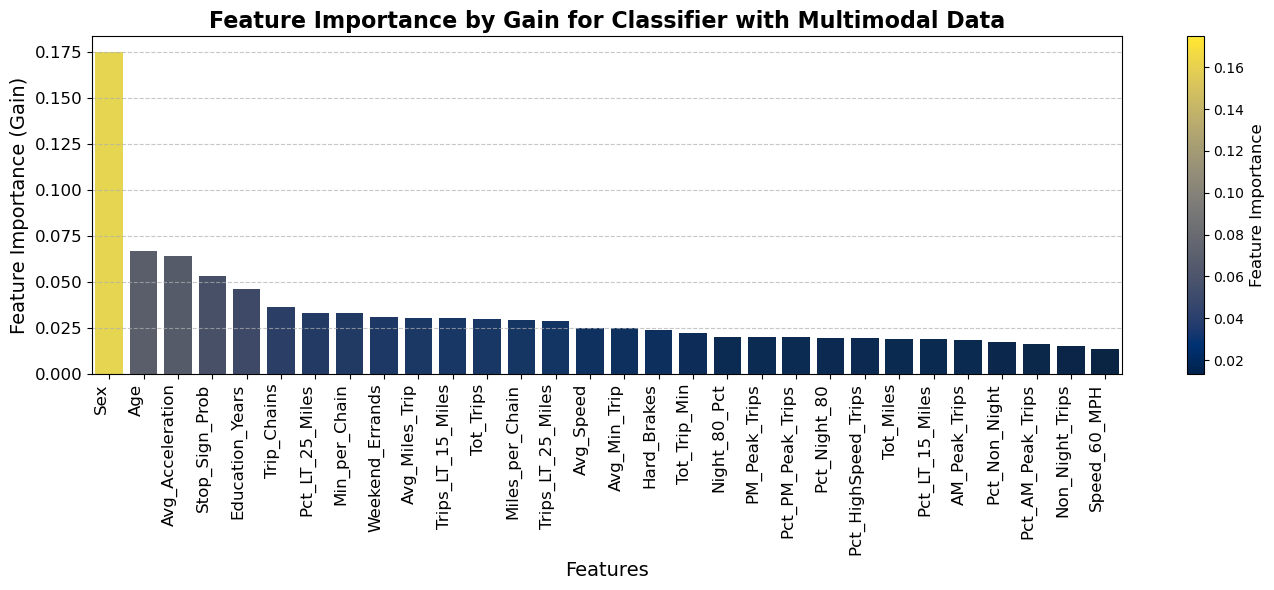

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature name mapping
feature_name_mapping = {
    'gender_male': 'Sex',
    'mean_tst': 'Mean_Total_Sleep_Time',
    'sd_tst': 'SD_Total_Sleep_Time',
    'age': 'Age',
    'avg_trip_accel_x': 'Avg_Acceleration',
    'mean_efficiency': 'Mean_SE',
    'stoppage_probability': 'Stop_Sign_Prob',
    'education_numberofyears_nacc': 'Education_Years',
    'percent_within_25_miles': 'Pct_LT_25_Miles',
    'sd_efficiency': 'Standard_Deviation_SE',
    'avg_miles_per_trip': 'Avg_Miles_Trip',
    'trip_chains': 'Trip_Chains',
    'within_25_miles': 'Trips_LT_25_Miles',
    'avg_trip_speed': 'Avg_Speed',
    'within_15_miles': 'Trips_LT_15_Miles',
    'avg_minutes_per_trip': 'Avg_Min_Trip',
    'hard_brake_events': 'Hard_Brakes',
    'percent_pm_4_6': 'Pct_PM_Peak_Trips',
    'errand_weekend_count': 'Weekend_Errands',
    'total_minutes': 'Tot_Trip_Min',
    'avg_miles_per_chain': 'Miles_per_Chain',
    'total_trips': 'Tot_Trips',
    'avg_minutes_per_chain': 'Min_per_Chain',
    'percent_am_7_9': 'Pct_AM_Peak_Trips',
    'percent_within_15_miles': 'Pct_LT_15_Miles',
    'total_miles': 'Tot_Miles',
    'pm_4_6_trips': 'PM_Peak_Trips',
    'percent_speed_60_mph': 'Pct_HighSpeed_Trips',
    'percent_nighttime_80': 'Pct_Night_80',
    'percent_non_nighttime': 'Pct_Non_Night',
    'am_7_9_trips': 'AM_Peak_Trips',
    'nighttime_80_percent': 'Night_80_Pct',
    'non_nighttime_trips': 'Non_Night_Trips',
    'speed_60_mph': 'Speed_60_MPH'
}

# Apply feature name mapping safely
feature_df['Features'] = feature_df['Features'].replace(feature_name_mapping)

# Sort features by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Generate a smooth color gradient from a colorblind-friendly palette
cmap = sns.color_palette("cividis", as_cmap=True)  # cividis for colorblind-friendly gradient
norm = plt.Normalize(feature_df['Importance'].min(), feature_df['Importance'].max())
colors = [cmap(norm(value)) for value in feature_df['Importance']]

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
bars = sns.barplot(x='Features', y='Importance', data=feature_df, palette=colors, ax=ax)

# Formatting
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Feature Importance (Gain)', fontsize=14)
ax.set_title('Feature Importance by Gain for Classifier with Multimodal Data', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate feature names for better visibility
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap="cividis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Feature Importance", fontsize=12)

plt.tight_layout()
plt.show()


In [308]:
# Save the plot to a file
plot_file_path = "C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/feature_importance_plot_demo_driving_baseline.png"
fig.tight_layout()
fig.savefig(plot_file_path)


# Return the file path to download
plot_file_path

'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/feature_importance_plot_demo_driving_baseline.png'

## feature for future prediction

                Features  Importance
0                    Sex    6.667248
1                    Age    3.412060
2        Education_Years    2.528261
3  Mean_Total_Sleep_Time    1.956968
4                Mean_SE    1.862889
5  Standard_Deviation_SE    1.475908
6    SD_Total_Sleep_Time    1.096308


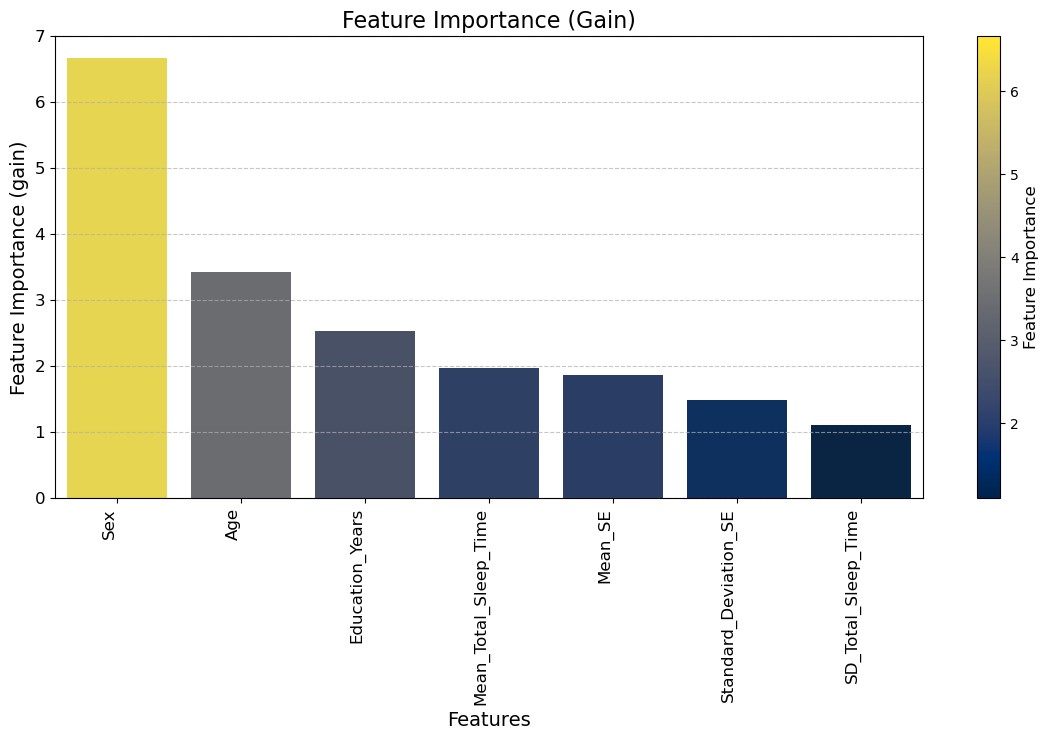

Saved figure to: C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\Future_prediction_results\feature_importance_demo_sleep_gain.png


In [315]:
import numpy as np
import pandas as pd
from joblib import load
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Load the frozen demo_sleep model
# -------------------------
MODEL_DIR = Path(
    r"C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/"
    r"LOSO_CV results/Trained models_classification"
)

model = load(MODEL_DIR / "xgb_frozen_baseline_demo_sleep.joblib")
booster = model.get_booster()

# -------------------------
# Choose importance type
# Options: "gain", "weight", "cover", "total_gain", "total_cover"
# "gain" is usually what people report.
# -------------------------
importance_type = "gain"

score_dict = booster.get_score(importance_type=importance_type)

# XGBoost returns feature names like "f0", "f1" if it didn't store names.
# But your model DOES show feature_names in booster, so we map properly.
feature_names = booster.feature_names  # should be the real column names

# Build dataframe with all features (including zeros if missing from get_score)
importance_vals = []
for f in feature_names:
    importance_vals.append(score_dict.get(f, 0.0))

feature_df = pd.DataFrame({
    "Features": feature_names,
    "Importance": importance_vals
})

# Optional: drop zeros (features never used in splits)
feature_df = feature_df[feature_df["Importance"] > 0].copy()

# -------------------------
# Apply your feature name mapping safely
# -------------------------
feature_name_mapping = {
    'gender_male': 'Sex',
    'mean_tst': 'Mean_Total_Sleep_Time',
    'sd_tst': 'SD_Total_Sleep_Time',
    'age': 'Age',
    'avg_trip_accel_x': 'Avg_Acceleration',
    'mean_efficiency': 'Mean_SE',
    'stoppage_probability': 'Stop_Sign_Prob',
    'education_numberofyears_nacc': 'Education_Years',
    'percent_within_25_miles': 'Pct_LT_25_Miles',
    'sd_efficiency': 'Standard_Deviation_SE',
    'avg_miles_per_trip': 'Avg_Miles_Trip',
    'trip_chains': 'Trip_Chains',
    'within_25_miles': 'Trips_LT_25_Miles',
    'avg_trip_speed': 'Avg_Speed',
    'within_15_miles': 'Trips_LT_15_Miles',
    'avg_minutes_per_trip': 'Avg_Min_Trip',
    'hard_brake_events': 'Hard_Brakes',
    'percent_pm_4_6': 'Pct_PM_Peak_Trips',
    'errand_weekend_count': 'Weekend_Errands',
    'total_minutes': 'Tot_Trip_Min',
    'avg_miles_per_chain': 'Miles_per_Chain',
    'total_trips': 'Tot_Trips',
    'avg_minutes_per_chain': 'Min_per_Chain',
    'percent_am_7_9': 'Pct_AM_Peak_Trips',
    'percent_within_15_miles': 'Pct_LT_15_Miles',
    'total_miles': 'Tot_Miles',
    'pm_4_6_trips': 'PM_Peak_Trips',
    'percent_speed_60_mph': 'Pct_HighSpeed_Trips',
    'percent_nighttime_80': 'Pct_Night_80',
    'percent_non_nighttime': 'Pct_Non_Night',
    'am_7_9_trips': 'AM_Peak_Trips',
    'nighttime_80_percent': 'Night_80_Pct',
    'non_nighttime_trips': 'Non_Night_Trips',
    'speed_60_mph': 'Speed_60_MPH'
}

feature_df["Features"] = feature_df["Features"].replace(feature_name_mapping)

# Sort features by importance in descending order
feature_df = feature_df.sort_values(by="Importance", ascending=False).reset_index(drop=True)

print(feature_df.head(20))

# -------------------------
# Plot (your style)
# -------------------------
cmap = sns.color_palette("cividis", as_cmap=True)
norm = plt.Normalize(feature_df["Importance"].min(), feature_df["Importance"].max())
colors = [cmap(norm(v)) for v in feature_df["Importance"]]

fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x="Features", y="Importance", data=feature_df, palette=colors, ax=ax)

ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel(f"Feature Importance ({importance_type})", fontsize=14)
ax.set_title("Feature Importance (Gain)", fontsize=16)
plt.xticks(rotation=90, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

sm = plt.cm.ScalarMappable(cmap="cividis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Feature Importance", fontsize=12)

fig_path = out_path/"feature_importance_demo_sleep_gain.png"
plt.savefig(fig_path, dpi=300, bbox_inches="tight")

plt.show()
print("Saved figure to:", fig_path)

# Optional: save to csv
out_path = Path(r"C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/Future_prediction_results")
out_path.mkdir(parents=True, exist_ok=True)
feature_df.to_csv(out_path / f"feature_importance_demo_sleep_{importance_type}.csv", index=False)

